# Загрузка и удаление пропусков

In [38]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('/content/drive/MyDrive/data/rice.csv', header = 0)
init_shape = data.shape
print(init_shape)

data.head()

(18185, 12)


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [39]:
data.dropna()

data = data.drop('id', axis=1) # id are useless

print("Удалено строк:", data.shape[0] - init_shape[0])

Удалено строк: 0


In [40]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


# Исследование данных

## Соотношение классов

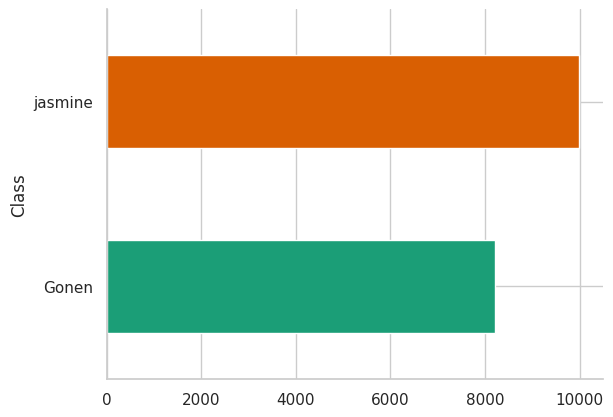

In [41]:
data.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Риса типа gonen немного меньше чем jasmine, после исследования данных необходимо синтезировать данные, чтобы уравнять количества.

# Обработка бинарного целевого признака

In [42]:
mapping = {'jasmine': 0, 'Gonen': 1}
data['Class'] = data['Class'].replace(mapping)

data['Class'].unique()

array([0, 1])

## Исследование признаков

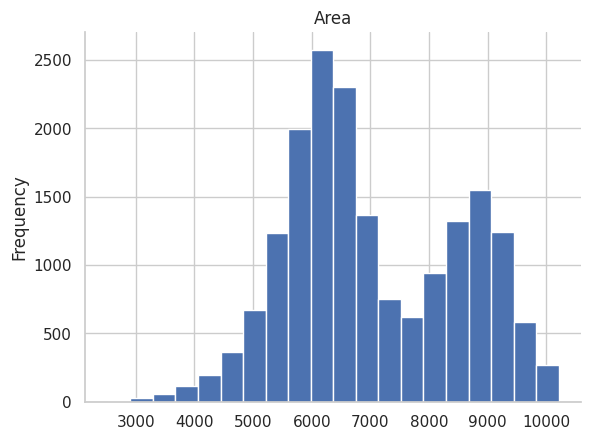

In [43]:
data['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

Площадь является неплохим признаком: есть два пика нормального распределения.

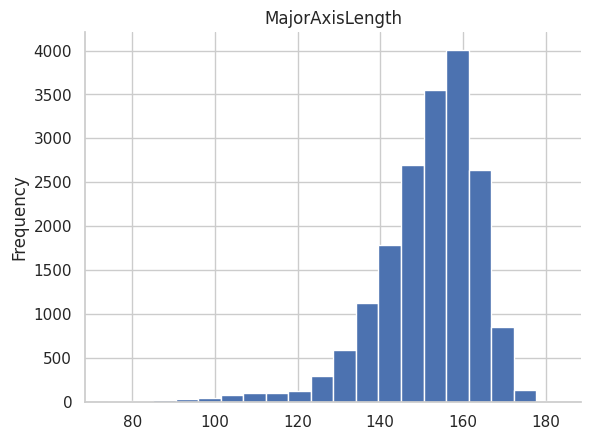

In [44]:
data['MajorAxisLength'].plot(kind='hist', bins=20, title='MajorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

Большая полуось - нет, так как она схожа среди двух видов.

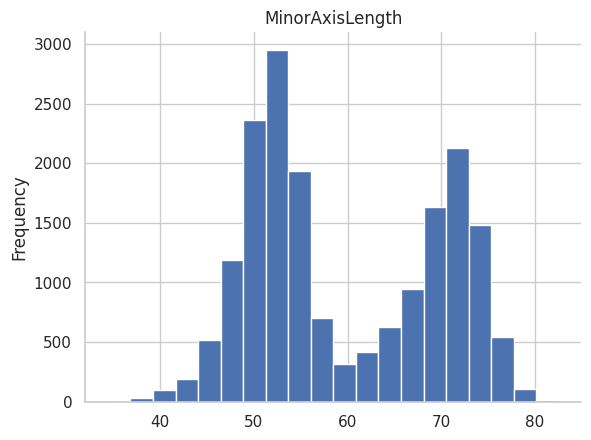

In [45]:
data['MinorAxisLength'].plot(kind='hist', bins=20, title='MinorAxisLength')
plt.gca().spines[['top', 'right',]].set_visible(False)

Малая полуось - да, есть два выраженных пика.

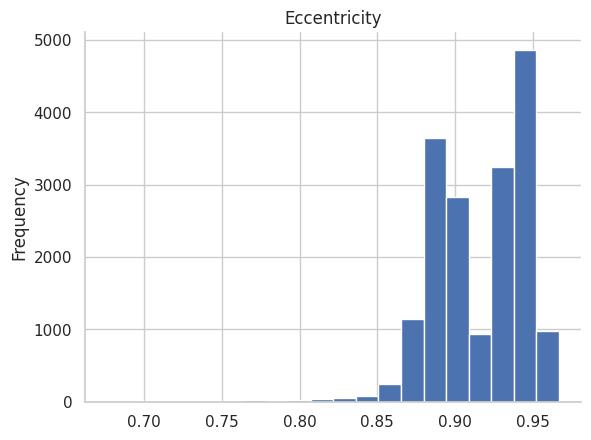

In [46]:
data['Eccentricity'].plot(kind='hist', bins=20, title='Eccentricity')
plt.gca().spines[['top', 'right',]].set_visible(False)

Эксцентриситет - да, есть два пика.

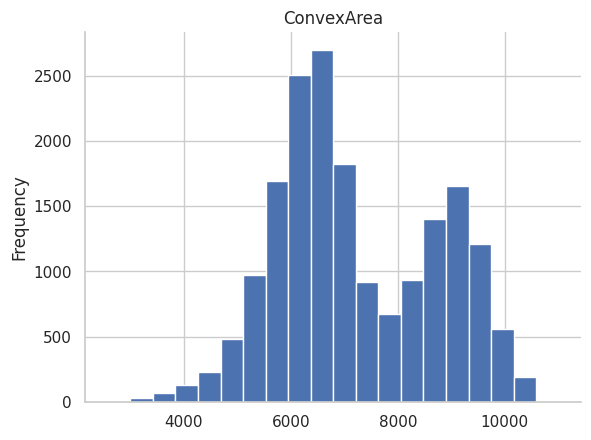

In [47]:
data['ConvexArea'].plot(kind='hist', bins=20, title='ConvexArea')
plt.gca().spines[['top', 'right',]].set_visible(False)

Выпуклая площадь - да, два пика.

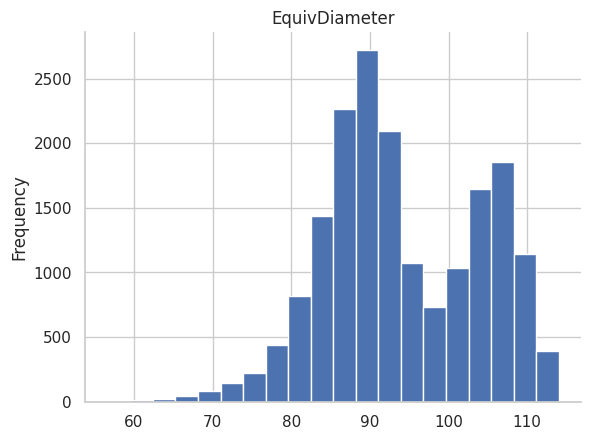

In [48]:
data['EquivDiameter'].plot(kind='hist', bins=20, title='EquivDiameter')
plt.gca().spines[['top', 'right',]].set_visible(False)

Эквивалентный диаметр - да, два пика.

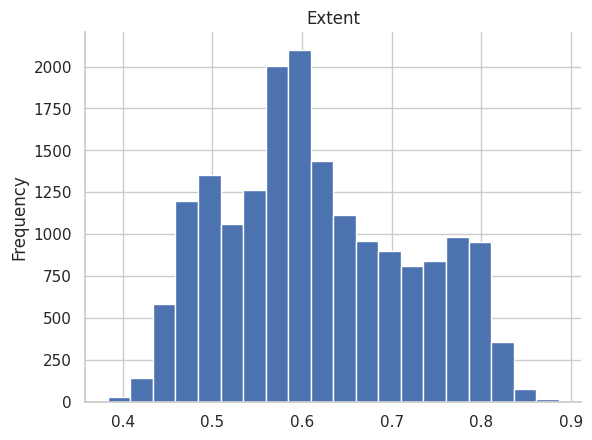

In [49]:
data['Extent'].plot(kind='hist', bins=20, title='Extent')
plt.gca().spines[['top', 'right',]].set_visible(False)

Степень - нет, нет ярко-выраженных двух пиков.

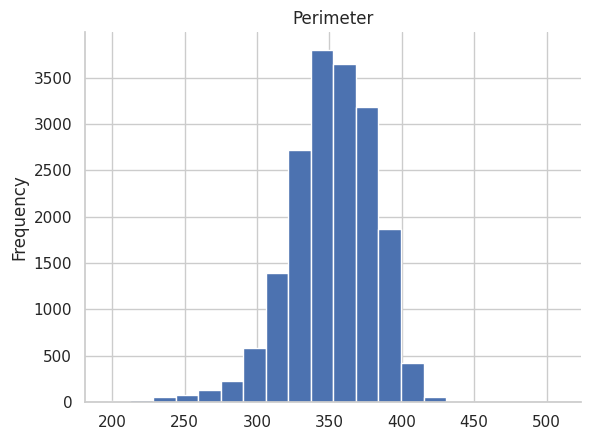

In [50]:
data['Perimeter'].plot(kind='hist', bins=20, title='Perimeter')
plt.gca().spines[['top', 'right',]].set_visible(False)

Периметр - нет, данные однообразны для двух видов.

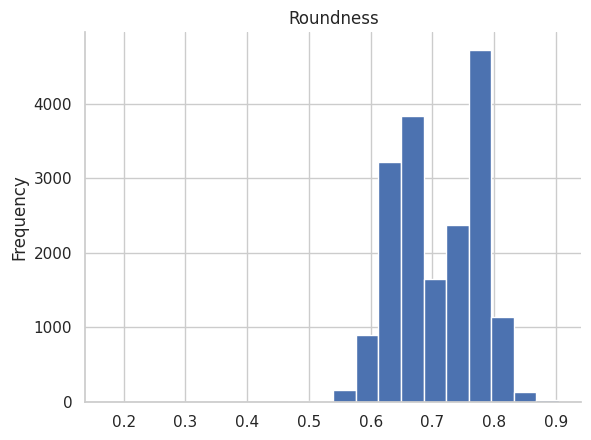

In [51]:
data['Roundness'].plot(kind='hist', bins=20, title='Roundness')
plt.gca().spines[['top', 'right',]].set_visible(False)

Округлость - да, два пика.

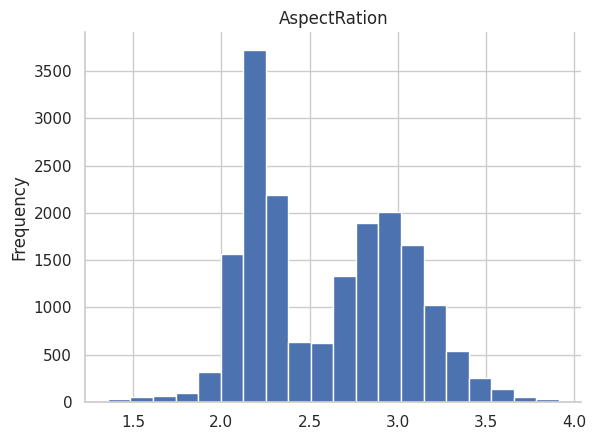

In [52]:
data['AspectRation'].plot(kind='hist', bins=20, title='AspectRation')
plt.gca().spines[['top', 'right',]].set_visible(False)

Соотношение сторон - да, два пика.

## Удаление коррелирующих признаков

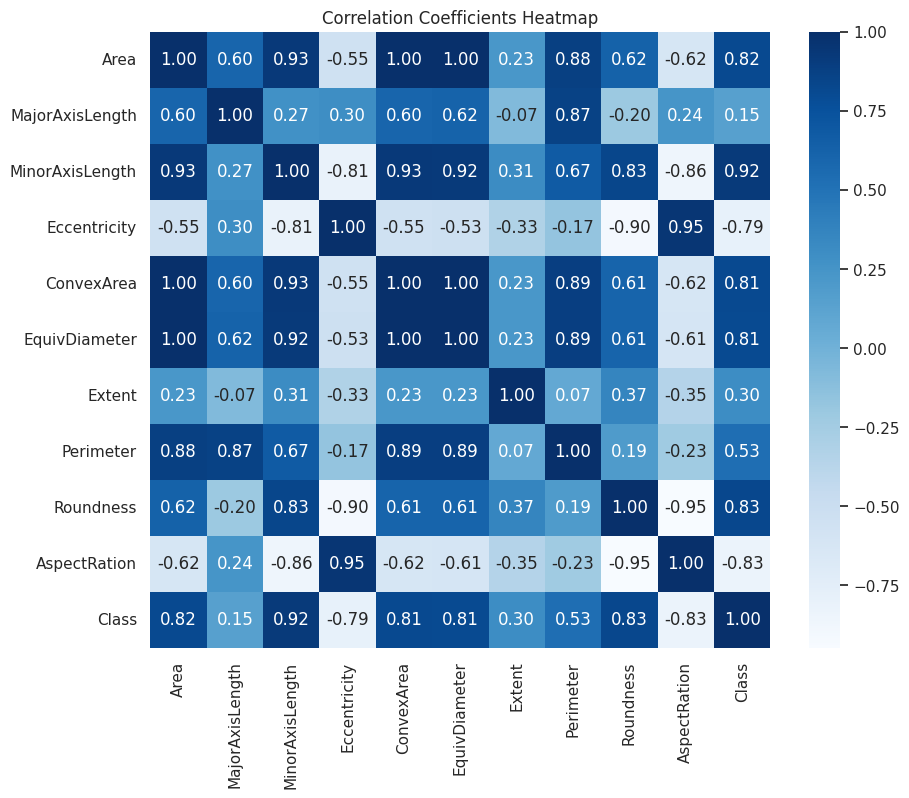

In [53]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Coefficients Heatmap')
plt.show()

In [54]:
from pandas import DataFrame

def remove_collinear_features(
    x: DataFrame,
    threshold: float,
    y_feature: str
    ) -> DataFrame:

    y = x[y_feature]
    x = x.drop(columns = [y_feature])

    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)

    x['Class'] = y

    return x

In [55]:
data_no_corr = remove_collinear_features(data, 0.93, 'Class')

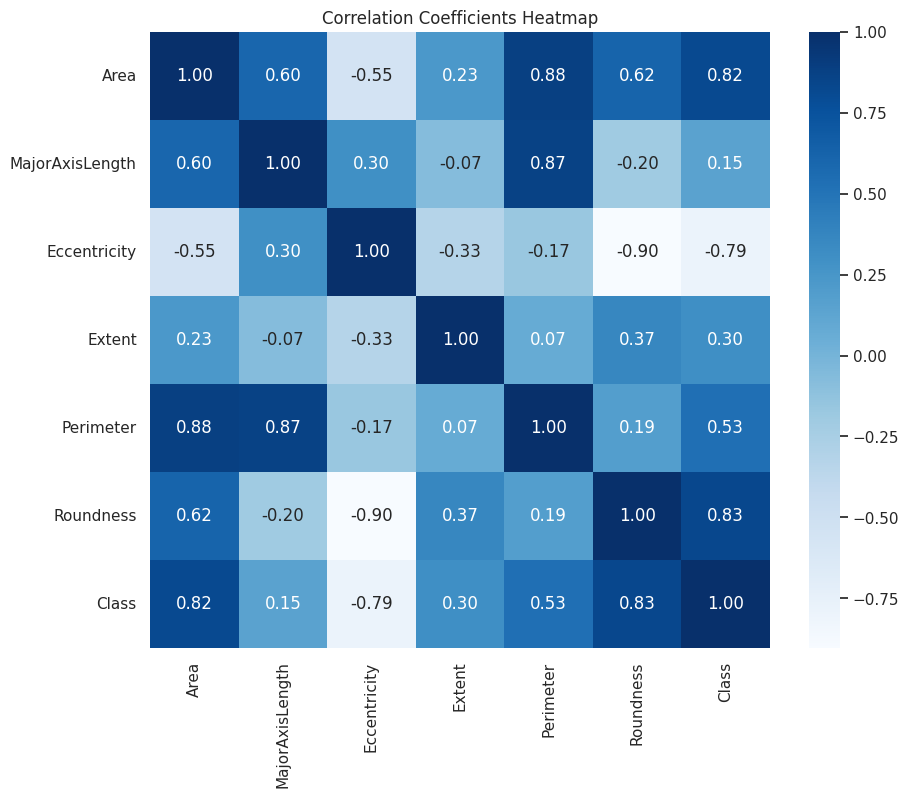

In [56]:
correlation_matrix = data_no_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Coefficients Heatmap')
plt.show()

# Обработка категориаольных признаков (не требуется)

# Дополнение данных

In [57]:
from imblearn.over_sampling import SMOTE

X = data_no_corr.loc[:, data_no_corr.columns != 'Class']
y = data_no_corr.loc[:, data_no_corr.columns == 'Class']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  14020
Number of no subscription in oversampled data 7010
Number of subscription 7010
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Проверим обновленное соотношение классов

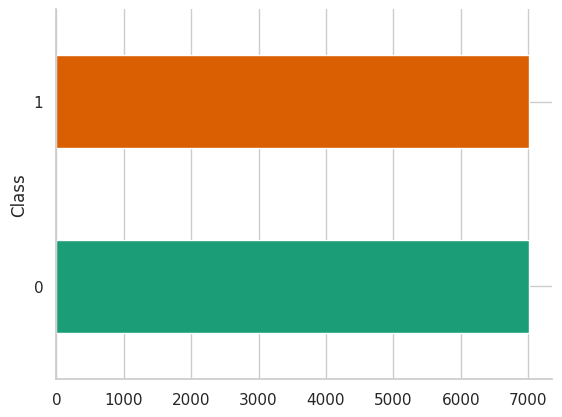

In [58]:
os_data_y.groupby('Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Рекурсивное удаление признаков

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final = data_no_corr.columns.values.tolist()
y=['Class']
X=[i for i in data_final if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False  True]
[2 1 1 2 2 1]


In [60]:
cols = ['MajorAxisLength', 'Eccentricity', 'Roundness']
X = data_no_corr[['MajorAxisLength', 'Eccentricity', 'Roundness']]
y = data_no_corr['Class']

# Реализация модели


In [61]:
import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.058845
         Iterations 11
                            Results: Logit
Model:                Logit              Method:             MLE      
Dependent Variable:   Class              Pseudo R-squared:   0.915    
Date:                 2024-03-31 21:59   AIC:                2146.1817
No. Observations:     18185              BIC:                2169.6067
Df Model:             2                  Log-Likelihood:     -1070.1  
Df Residuals:         18182              LL-Null:            -12517.  
Converged:            1.0000             LLR p-value:        0.0000   
No. Iterations:       11.0000            Scale:              1.0000   
----------------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
----------------------------------------------------------------------
MajorAxisLength    0.3336   0.0104  31.9348 0.0000    0.3131    0.3541
Ec

Значение "влияния" (P>|z|) равно 0 для всех 3 признаков.

# Обучение модели логистической регрессии

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Определение точности и подведение итогов

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2949   26]
 [  96 2385]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2975
           1       0.99      0.96      0.98      2481

    accuracy                           0.98      5456
   macro avg       0.98      0.98      0.98      5456
weighted avg       0.98      0.98      0.98      5456



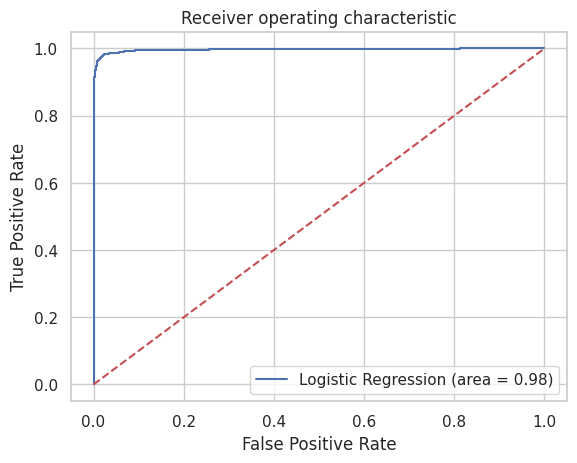

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()